# NLP: Hotel Reviews Part 1

### Audrey Gilbreath

##### August 2022

---

## Data Dictionary

The csv contains data on hotel reviews left by guests and data on the guest.

**Reviewer**   
A hotel guest who left a review.


**Hotel_Address**  *object*    
Hotel address

**Additional_Number_of_Scoring** *int64*    



**Review_Date**  *datetime64[ns]*    
Date the review left the reviewer

---
## Preprocessing

Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

Load data

In [2]:
df = pd.read_csv(
    '/Users/audreygilbreath/Documents/Brain Station/Deliverables/5. NLP- Hotel Review Part 1/Hotel_Reviews.csv')

df = pd.DataFrame(data=df)

df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

- The Review_Date column datatype will need to be converted to datetime datatype.
- The days_since_review column will need the "days" label dropped so that there is only an integer in the column so that the datatype can be converted to int.
- 'lat' and 'lng' columns are missing values.
    - I will use the Hotel_Address column to find and fill the missing latitudes and longitudes.

In [4]:
# Convert 'Review_Date' datatype to datetime
df['Review_Date'] = pd.to_datetime(df['Review_Date'])

# Sanity check
df['Review_Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 515738 entries, 0 to 515737
Series name: Review_Date
Non-Null Count   Dtype         
--------------   -----         
515738 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.9 MB


In [5]:
# Split 'days_since_review column into integer and string
df['days_since_review'] = df['days_since_review'].str.split(' d').str[0]

# Sanity check
df['days_since_review'].head()

0     0
1     0
2     3
3     3
4    10
Name: days_since_review, dtype: object

In [6]:
# Convert 'days_since_review' datatype to int
df['days_since_review'] = pd.to_numeric(df['days_since_review'])

# Sanity check
df['days_since_review'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 515738 entries, 0 to 515737
Series name: days_since_review
Non-Null Count   Dtype
--------------   -----
515738 non-null  int64
dtypes: int64(1)
memory usage: 3.9 MB


Let's confirm that the rows with missing 'lat' and 'lng' values are the same rows.

In [7]:
df[
    (
        (df['lat'].isnull() == True) 
        | 
        (df['lng'].isnull() == True)
    ) 
    & 
    (
        (df['lat'].isna() != df['lng'].isna())
    ) 
][['lat', 'lng']].count()

lat    0
lng    0
dtype: int64

Every row either has both the latitude and longitude or has NaN for both the latitude or longitude.

There are 17 hotel addresses that are missing latitude and longitude data.

In [8]:
missing_hotels = df[df['lat'].isna() == True]['Hotel_Address'].value_counts()
missing_hotels.index

Index(['Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria',
       'Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria',
       'W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria',
       '4 rue de la P pini re 8th arr 75008 Paris France',
       'Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria',
       'W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria',
       'Savoyenstra e 2 16 Ottakring 1160 Vienna Austria',
       'Sieveringer Stra e 4 19 D bling 1190 Vienna Austria',
       'Bail n 4 6 Eixample 08010 Barcelona Spain',
       'Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria',
       'Hasenauerstra e 12 19 D bling 1190 Vienna Austria',
       'Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria',
       '23 Rue Damr mont 18th arr 75018 Paris France',
       'Paragonstra e 1 11 Simmering 1110 Vienna Austria',
       '20 Rue De La Ga t 14th arr 75014 Paris France',
       'Pau Clar s 122 Eixample 08009 Barcelona Spain',
       'Sep lveda 180 Eix

All rows for the above hotels are missing latitude and longitude.

I will google the hotel address to find its latitude and longitude.

**Hotel_Address, lat, lng:**  
Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria, 48.20954467425798, 16.35337623326898   
Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria, 48.213694614318854, 16.380036024877068     
W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria, 48.22058193737448, 16.355775682547232      
4 rue de la P pini re 8th arr 75008 Paris France, 48.873136596126656, 2.2977560383930884     
Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria, 48.19534735992597, 16.395048893198915     
W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria, 48.21694970322591, 16.359927155557052     
Savoyenstra e 2 16 Ottakring 1160 Vienna Austria, 48.21972659346829, 16.28560726322709    
Sieveringer Stra e 4 19 D bling 1190 Vienna Austria, 48.246177462196805, 16.341504111383024     
Bail n 4 6 Eixample 08010 Barcelona Spain, 41.391574510062235, 2.1781781111798955      
Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria, 48.22181368134285, 16.360848980702315      
Hasenauerstra e 12 19 D bling 1190 Vienna Austria, 48.268781907447156, 16.340418112785713        
Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria, 48.20969902448476, 16.351431111381878     
23 Rue Damr mont 18th arr 75018 Paris France, 48.88906156778187, 2.333141642083452       
Paragonstra e 1 11 Simmering 1110 Vienna Austria, 48.1879293927776, 16.41334861271346    
20 Rue De La Ga t 14th arr 75014 Paris France, 48.840433716945896, 2.3234674072040478    
Pau Clar s 122 Eixample 08009 Barcelona Spain, 41.392973899367405, 2.1673974976848696     
Sep lveda 180 Eixample 08011 Barcelona Spain, 41.38346387590471, 2.1629925130245935   


Next, I will create a list with each row being a sublist. Then I will write a for-loop to fillna('lat', 'lng').

In [9]:
# Create list
missing_hotels = [
    ['Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria', 48.20954467425798, 16.35337623326898],
    ['Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria', 48.213694614318854, 16.380036024877068],
    ['W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria', 48.22058193737448, 16.355775682547232],
    ['4 rue de la P pini re 8th arr 75008 Paris France', 48.873136596126656, 2.2977560383930884],
    ['Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria', 48.19534735992597, 16.395048893198915],
    ['W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria', 48.21694970322591, 16.359927155557052],
    ['Savoyenstra e 2 16 Ottakring 1160 Vienna Austria', 48.21972659346829, 16.2856072632270],
    ['Sieveringer Stra e 4 19 D bling 1190 Vienna Austria', 48.246177462196805, 16.341504111383024],
    ['Bail n 4 6 Eixample 08010 Barcelona Spain', 41.391574510062235, 2.1781781111798955],
    ['Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria', 48.22181368134285, 16.360848980702315],
    ['Hasenauerstra e 12 19 D bling 1190 Vienna Austria', 48.268781907447156, 16.340418112785713],
    ['Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria', 48.20969902448476, 16.351431111381878],
    ['23 Rue Damr mont 18th arr 75018 Paris France', 48.88906156778187, 2.333141642083452],
    ['Paragonstra e 1 11 Simmering 1110 Vienna Austria', 48.1879293927776, 16.4133486127134],
    ['20 Rue De La Ga t 14th arr 75014 Paris France', 48.840433716945896, 2.323467407204047],
    ['Pau Clar s 122 Eixample 08009 Barcelona Spain', 41.392973899367405, 2.1673974976848696],
    ['Sep lveda 180 Eixample 08011 Barcelona Spain', 41.38346387590471, 2.1629925130245935],
]

missing_hotels

[['Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria',
  48.20954467425798,
  16.35337623326898],
 ['Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria',
  48.213694614318854,
  16.380036024877068],
 ['W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria',
  48.22058193737448,
  16.355775682547232],
 ['4 rue de la P pini re 8th arr 75008 Paris France',
  48.873136596126656,
  2.2977560383930884],
 ['Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria',
  48.19534735992597,
  16.395048893198915],
 ['W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria',
  48.21694970322591,
  16.359927155557052],
 ['Savoyenstra e 2 16 Ottakring 1160 Vienna Austria',
  48.21972659346829,
  16.285607263227],
 ['Sieveringer Stra e 4 19 D bling 1190 Vienna Austria',
  48.246177462196805,
  16.341504111383024],
 ['Bail n 4 6 Eixample 08010 Barcelona Spain',
  41.391574510062235,
  2.1781781111798955],
 ['Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria',
  48.22181368134285,
  16.360848

In [10]:
# For-loop to fill map missing_hotels lat and lng to df lat and lng.

for l in range(len(missing_hotels)): # iterates over sublists (i.e., the hotel addesses with missing latitude and longitude points)

    hotel = df[df['Hotel_Address'] == missing_hotels[l][0]].copy() 
    # creating a new dataframe that contains all the rows with the same hotel address from df that matches the missing_hotels element in 0-th position in the l-th sublist 

    hotel['lat'] = missing_hotels[l][1] # fillna(missing hotel's latitude)
    hotel['lng'] = missing_hotels[l][2] # fillna(missing hotel's longitude)

    df[df['Hotel_Address'] == missing_hotels[l][0]] = hotel # funneling the filled in latitudes and longitudes back into the original dataframe.

df.isna().sum()  # sanity check

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
dtype: int64

All of the missing latitudes and longitudes have been found and filled. The Hotel_Address is no longer necessary and will be dropped.

In [11]:
df = df.drop('Hotel_Address', axis=1)
df.head()

,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,52.360576,4.915968
1,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,52.360576,4.915968
2,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3,52.360576,4.915968
3,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3,52.360576,4.915968
4,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10,52.360576,4.915968


---
## Part 1
### Question 1a)
##### What is the shape of the data?
There are 515,738 rows and 17 columns.
##

#

### Question 1b)
##### Convert the Reviewer_Score column datatype to integer
To do this I will round the values in the column to the nearest whole number.


In [12]:
df['Reviewer_Score'] = [round(score) for score in df['Reviewer_Score']]
df

,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,3,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,52.360576,4.915968
1,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,8,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,52.360576,4.915968
2,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7,"[' Leisure trip ', ' Family with young childre...",3,52.360576,4.915968
3,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,4,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3,52.360576,4.915968
4,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,168,2015-08-30,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7,"[' Leisure trip ', ' Family with older childre...",704,48.203745,16.335677
515734,168,2015-08-22,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,6,"[' Leisure trip ', ' Family with young childre...",712,48.203745,16.335677
515735,168,2015-08-19,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2,"[' Leisure trip ', ' Family with older childre...",715,48.203745,16.335677
515736,168,2015-08-17,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,9,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717,48.203745,16.335677


In [13]:
# Sanity check. 
df['Reviewer_Score'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 515738 entries, 0 to 515737
Series name: Reviewer_Score
Non-Null Count   Dtype
--------------   -----
515738 non-null  int64
dtypes: int64(1)
memory usage: 3.9 MB


Reviewer_Score column datatype is now integer

### Question 1c)
1. ##### What should the distribution of scores look like?
    - I expect the mean score to be greater than 5, perhaps around 7, which will result in a left skewed distribution. I am expecting this since it would be bad for business to have a mean score below what is considered "acceptable". 
    - Preferably the distribution would be normal, however then the mean would be 5. 5 is a pretty low mean score and hotels with a mean score of 5 wouldn't attract a lot of business.
    -A right skewed distribution would have a mean score less than 5. No one wants to stay at a hotel with a score that low, so improbable.

2. ##### What is the actual distribution of reviews?

I will plot a seaborn pairplot to check distributions and correlations, a bar chart of Reviewer_Score (which will act as a histogram) abd a normal Q-Q plot to investigate the distribution. To plot the bar chart I will do an aggegate count by reviewer score, then pass it into a plotly express bar chart. Since the lowest score given is a 2, I will also add scores of 0 and 1 with a count of 0. I feel this is an acceptable inclusion to the data since scores of 0 and 1 are possible, and since their count is technically zero.

In [14]:
#sns.pairplot(df)
#plt.show()

It looks like Reviewer_Score is left skewed, as is Average_Score, which makes sense.

There is a positive correlation between Total_Number_of_Reviews and Additional_Number_of_Scoring, as well.

In [15]:
# sum count of review scores, ordered by review score and stored as a list.
data1 = df['Reviewer_Score'].copy()
Sdata1 = data1.value_counts().sort_index()
LIdata1 = list(Sdata1.index)
LIdata1 = [0, 1] + LIdata1
LVdata1 = list(Sdata1.values)
LVdata1 = [0, 0] + LVdata1
Ldata1 = [[LIdata1], [LVdata1]]

print(data1, '\n\n')
print(Sdata1, '\n\n')
print(LIdata1, '\n\n')
print(LVdata1, '\n\n')
print(Ldata1)

0         3
1         8
2         7
3         4
4         7
         ..
515733    7
515734    6
515735    2
515736    9
515737    8
Name: Reviewer_Score, Length: 515738, dtype: int64 


2       2199
3       4406
4       9436
5      24188
6      27800
7      44088
8     110155
9     105722
10    187744
Name: Reviewer_Score, dtype: int64 


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 


[0, 0, 2199, 4406, 9436, 24188, 27800, 44088, 110155, 105722, 187744] 


[[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]], [[0, 0, 2199, 4406, 9436, 24188, 27800, 44088, 110155, 105722, 187744]]]


In [16]:
ddata1 = {
    'score': LIdata1,
    'count': LVdata1
}

ddata1 = pd.DataFrame(data=ddata1, columns={'count': ddata1['count']})
ddata1


,count
0,0
1,0
2,2199
3,4406
4,9436
5,24188
6,27800
7,44088
8,110155
9,105722


In [17]:
fig1 = px.bar(ddata1)
fig1.show()

The bar chart shows that the data is not normally distributed, but is left skewed.

In [18]:
#fig2 = px.box(df['Reviewer_Score'], orientation='h')
#fig2.show()

The above distribution shows the count for each score value. The distribution is left skewed.

Normal Q-Q plot of score counts:

In [19]:
from scipy import stats

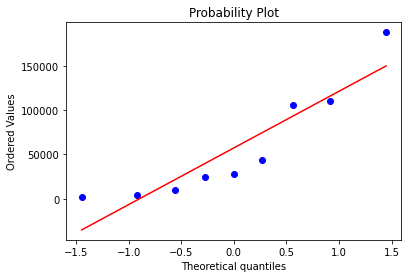

In [20]:
plt.figure()
stats.probplot(df['Reviewer_Score'].value_counts(), plot=plt)
plt.show()

This aggregation is not normally distributed.

Normal Q-Q plot of scores: 

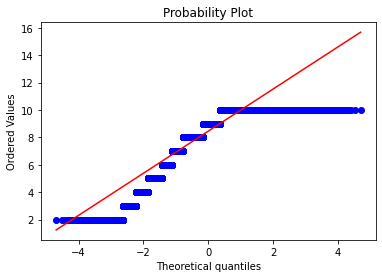

In [21]:
plt.figure()
stats.probplot(data1, plot=plt)
plt.show()

The distribution is not normal and it looks like the data is left skewed.

### Question 1d)
##### Since this data will be used for classification, what is a potential problem with the distribution?

Since the data is not normally distributed, parametric tests cannot be used. However, the scores will later be converted into binary values, 0 for bad review, 1 for a good review, and used in the model. I will check for normal distribution then and transform the data if skewed then.

---
## Part 2
### Question 2a)
##### Which columns are numeric and which are non-numeric?

In [22]:
# Numeric columns
df[df.select_dtypes('number').columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 10 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Additional_Number_of_Scoring                515738 non-null  int64  
 1   Average_Score                               515738 non-null  float64
 2   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 3   Total_Number_of_Reviews                     515738 non-null  int64  
 4   Review_Total_Positive_Word_Counts           515738 non-null  int64  
 5   Total_Number_of_Reviews_Reviewer_Has_Given  515738 non-null  int64  
 6   Reviewer_Score                              515738 non-null  int64  
 7   days_since_review                           515738 non-null  int64  
 8   lat                                         515738 non-null  float64
 9   lng                                         515738 non-null  float64
d

In [23]:
# Non-numeric columns
df[df.select_dtypes('object').columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Hotel_Name            515738 non-null  object
 1   Reviewer_Nationality  515738 non-null  object
 2   Negative_Review       515738 non-null  object
 3   Positive_Review       515738 non-null  object
 4   Tags                  515738 non-null  object
dtypes: object(5)
memory usage: 19.7+ MB


One thing to note is that Review_Date column is not included in the numeric or non-numeric columns.

### Question 2b)
##### Identify non-numeric columns that can be converted to numeric columns.

Non-numeric data columns that can be converted into numeric data columns are:    
Reviewer_Nationality (one-hot encoding)   
Negative_Review (vectorize)   
Positive_Review (vectorize)    
tags (vectorize)    
Hotel_Name (one-hot encoding)   

---
## Part 3

##### First, I will use a sample of the data. The sample will need to include all classes and enough of each class so that each class in the training and test data.

In [24]:
X_pop = df.drop(columns='Reviewer_Score').copy()
y_pop = df['Reviewer_Score'].copy()

In [25]:
X_pop.head()

,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Tags,days_since_review,lat,lng
0,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,52.360576,4.915968
1,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,52.360576,4.915968
2,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,"[' Leisure trip ', ' Family with young childre...",3,52.360576,4.915968
3,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3,52.360576,4.915968
4,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10,52.360576,4.915968


In [26]:
# Sanity check
y_pop.head()

0    3
1    8
2    7
3    4
4    7
Name: Reviewer_Score, dtype: int64

In [27]:
y_pop.shape

(515738,)

In [28]:
from sklearn.model_selection import train_test_split

X_sample, X_leftover, y_sample, y_leftover = train_test_split(X_pop, y_pop, test_size=0.85, stratify=y_pop, random_state=1)

In [29]:
# Sanity check
print(f"y_sample: {y_sample.shape}")
print(f"X_sample: {X_sample.shape}")

y_sample: (77360,)
X_sample: (77360, 15)


X and y now contain 15% of the data. I need to the sample and population data come from the same distribution and that all classes are accounted for.

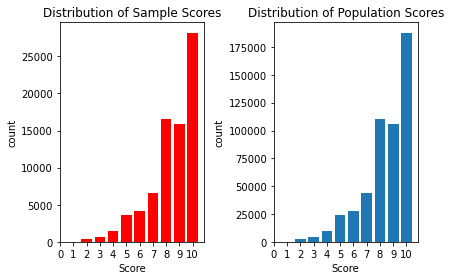

In [30]:
# y_sample & y (target variable) distribution

plt.subplots(1, 2)

plt.subplot(1, 2, 1)
plt.bar(y_sample.value_counts().index, y_sample.value_counts().values, color='red')
plt.xlabel('Score')
plt.ylabel('count')
plt.title('Distribution of Sample Scores')
plt.xticks(ticks=range(0,11))

plt.subplot(1, 2, 2)
plt.bar(df['Reviewer_Score'].value_counts().index, df['Reviewer_Score'].value_counts().values)
plt.xlabel('Score')
plt.ylabel('count')
plt.title('Distribution of Population Scores')
plt.xticks(ticks=range(0,11))

plt.tight_layout()
plt.show()

The sample data has the same distribution as the population data.

### Question 3a)
##### Convert the Reviewer_Score column into a binary column such that scores that are less than 9 are encoded as 0 (is not a good score) and 10 is encoded as 1 (is a good score).

In [31]:
y_sample

82462      7
218261     8
144535     9
278689    10
464475    10
          ..
236153     8
191380     8
431566     8
40977      8
344804     8
Name: Reviewer_Score, Length: 77360, dtype: int64

In [32]:
# Convert the y_sample series into a pandas dataframe
y_sample = y_sample.to_frame()

In [33]:
# Sanity check
y_sample.head()

,Reviewer_Score
82462,7
218261,8
144535,9
278689,10
464475,10


In [34]:
# Create map of scores 0 to 9 -> zero and 10 -> one.
mapping = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:1}

# Mapping the scores to their categorical values
y_mapped_sample = y_sample['Reviewer_Score'].map(mapping)

# Converting to dataframe
y_mapped_sample = y_mapped_sample.to_frame()

y_clean_sample = y_mapped_sample

# Sanity check
y_clean_sample.head()

,Reviewer_Score
82462,0
218261,0
144535,0
278689,1
464475,1


The sample target data has now been encoded to binary values. 0 (bad movie rating), 1 (good movie rating).

In [35]:
df_sample = pd.concat([X_sample, y_sample], axis=1)

df_sample.head()

,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Tags,days_since_review,lat,lng,Reviewer_Score
82462,69,2015-09-12,8.6,Best Western Premier Op ra Opal,United Arab Emirates,WI FI was bad,5,772,Location is excellent The worse was WI FI fac...,14,16,"[' Leisure trip ', ' Couple ', ' Deluxe Double...",691,48.872259,2.325761,7
218261,36,2017-02-25,7.0,Hotel Royal Elys es,Israel,Door of the room didn t closed by itself but ...,27,251,Bathroom was bed door was ripped and the show...,17,1,"[' Business trip ', ' Solo traveler ', ' Singl...",159,48.872967,2.292623,8
144535,524,2017-02-04,8.2,The Queens Gate Hotel,Australia,There was a terrible noise in the bedroom thr...,32,2516,Location of the hotel and value for money siz...,15,1,"[' Leisure trip ', ' Family with young childre...",180,51.498123,-0.179969,9
278689,541,2016-08-28,7.9,Catalonia Atenas,United Kingdom,No Negative,0,6792,What a fabulous trip From the minute we walke...,264,1,"[' Leisure trip ', ' Couple ', ' Double or Twi...",340,41.411006,2.186601,10
464475,404,2017-03-12,9.1,Hotel Stefanie,United States of America,Front desk guy was snippy though would occasi...,12,3883,Rooms were awesome and well appointed Very cl...,26,7,"[' Business trip ', ' Group ', ' 2 rooms ', ' ...",144,48.214277,16.380178,10


### Question 3b)
##### Convert the non-numeric columns identified in Part 2 into numeric columns, except for the Positive_Review and Negative_Review columns.

In [36]:
# List of numeric columns
numeric_col_list = list(X_sample.select_dtypes('number').columns)

# List of non-numeric columns
categorical_col_list = list(X_sample.select_dtypes('object').columns)

print(numeric_col_list)
print(categorical_col_list)

['Additional_Number_of_Scoring', 'Average_Score', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'days_since_review', 'lat', 'lng']
['Hotel_Name', 'Reviewer_Nationality', 'Negative_Review', 'Positive_Review', 'Tags']


In [37]:
X_clean_sample = X_sample[numeric_col_list].copy()
X_clean_sample.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng
82462,69,8.6,5,772,14,16,691,48.872259,2.325761
218261,36,7.0,27,251,17,1,159,48.872967,2.292623
144535,524,8.2,32,2516,15,1,180,51.498123,-0.179969
278689,541,7.9,0,6792,264,1,340,41.411006,2.186601
464475,404,9.1,12,3883,26,7,144,48.214277,16.380178


In [38]:
dirty_X_sample = X_sample[categorical_col_list].copy()
dirty_X_sample.head()

,Hotel_Name,Reviewer_Nationality,Negative_Review,Positive_Review,Tags
82462,Best Western Premier Op ra Opal,United Arab Emirates,WI FI was bad,Location is excellent The worse was WI FI fac...,"[' Leisure trip ', ' Couple ', ' Deluxe Double..."
218261,Hotel Royal Elys es,Israel,Door of the room didn t closed by itself but ...,Bathroom was bed door was ripped and the show...,"[' Business trip ', ' Solo traveler ', ' Singl..."
144535,The Queens Gate Hotel,Australia,There was a terrible noise in the bedroom thr...,Location of the hotel and value for money siz...,"[' Leisure trip ', ' Family with young childre..."
278689,Catalonia Atenas,United Kingdom,No Negative,What a fabulous trip From the minute we walke...,"[' Leisure trip ', ' Couple ', ' Double or Twi..."
464475,Hotel Stefanie,United States of America,Front desk guy was snippy though would occasi...,Rooms were awesome and well appointed Very cl...,"[' Business trip ', ' Group ', ' 2 rooms ', ' ..."


In [39]:
#sns.pairplot(X_clean_sample)
#plt.show()

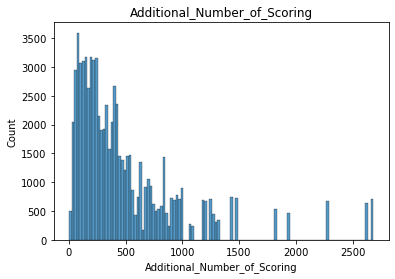

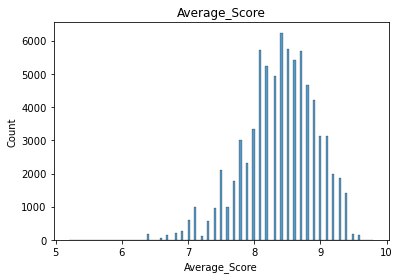

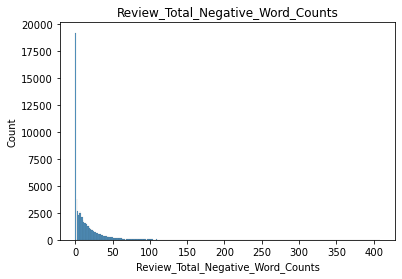

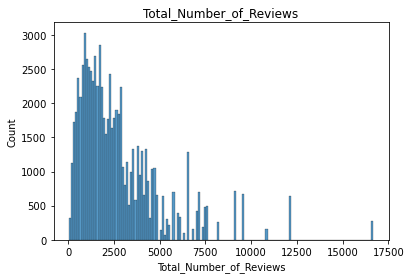

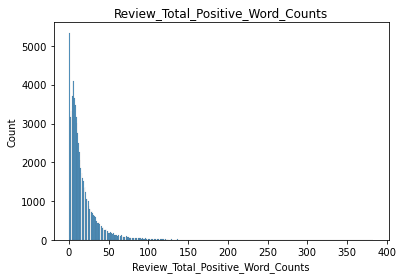

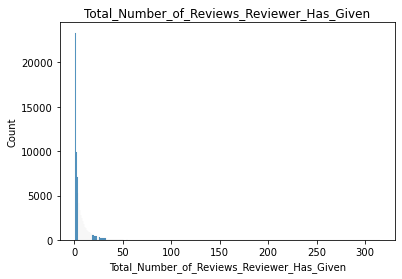

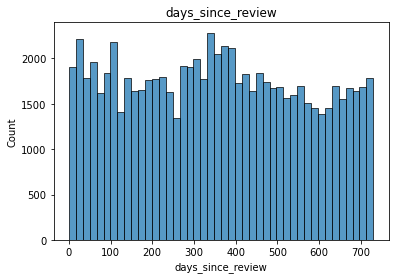

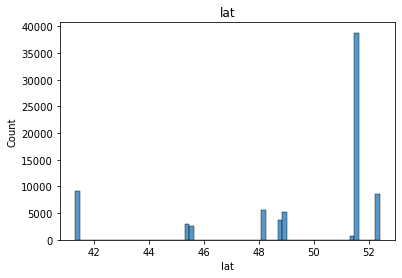

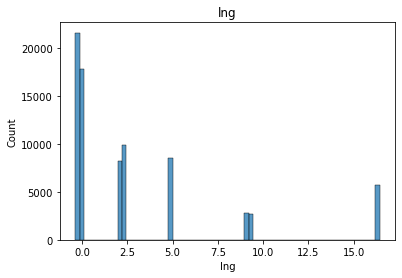

In [40]:
for c in X_clean_sample.columns:
    sns.histplot(x=c, data=X_clean_sample)
    plt.title(c)
    plt.show()

Most of the distributions above are not normal distributions.

In [41]:
X_clean_sample.corr()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng
Additional_Number_of_Scoring,1.000000,-0.155026,0.027418,0.827607,-0.057890,-0.069656,0.012481,0.336705,-0.297851
Average_Score,-0.155026,1.000000,-0.112855,-0.181683,0.109986,0.031737,-0.014708,-0.110979,0.101279
Review_Total_Negative_Word_Counts,0.027418,-0.112855,1.000000,0.030243,0.109109,0.001210,-0.044998,0.021049,-0.022869
Total_Number_of_Reviews,0.827607,-0.181683,0.030243,1.000000,-0.037630,-0.024010,0.008246,0.102015,-0.018419
Review_Total_Positive_Word_Counts,-0.057890,0.109986,0.109109,-0.037630,1.000000,0.030255,-0.048666,-0.033905,0.035719
Total_Number_of_Reviews_Reviewer_Has_Given,-0.069656,0.031737,0.001210,-0.024010,0.030255,1.000000,0.033259,-0.055062,0.110171
days_since_review,0.012481,-0.014708,-0.044998,0.008246,-0.048666,0.033259,1.000000,0.001614,0.003529
lat,0.336705,-0.110979,0.021049,0.102015,-0.033905,-0.055062,0.001614,1.000000,-0.300913
lng,-0.297851,0.101279,-0.022869,-0.018419,0.035719,0.110171,0.003529,-0.300913,1.000000


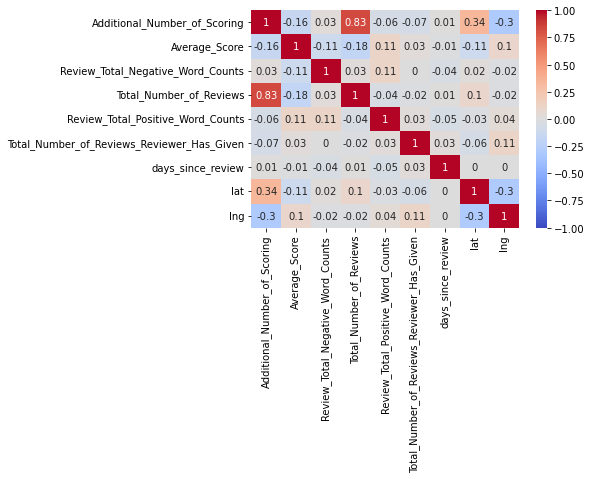

In [42]:
sns.heatmap(X_clean_sample.corr().round(2), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

There is a strong positive correlation between Total_Number_of_Reviews and Additional_Number_of_Scoring. 

In [43]:
df_clean_sample = pd.concat([X_clean_sample, y_clean_sample], axis=1)

df_clean_sample.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,Reviewer_Score
82462,69,8.6,5,772,14,16,691,48.872259,2.325761,0
218261,36,7.0,27,251,17,1,159,48.872967,2.292623,0
144535,524,8.2,32,2516,15,1,180,51.498123,-0.179969,0
278689,541,7.9,0,6792,264,1,340,41.411006,2.186601,1
464475,404,9.1,12,3883,26,7,144,48.214277,16.380178,1


The plan for converting categorical to numerical data:
- find the number of classes in the feature
- encode Reviewer_Nationality, Hotel_Name, and Tags using OHE
- add the encoded feature to df_clean_sample
- remove the feature from categorical_col_list
- repeat

In [44]:
dirty_X_sample.nunique().sort_values()

Reviewer_Nationality      196
Hotel_Name               1489
Tags                    18021
Negative_Review         51199
Positive_Review         64563
dtype: int64

Convert Reviewer_Nationality to numerical:

In [45]:
dirty_X_sample['Reviewer_Nationality'].unique()

array([' United Arab Emirates ', ' Israel ', ' Australia ',
       ' United Kingdom ', ' United States of America ', ' Portugal ',
       ' Malaysia ', ' Kuwait ', ' France ', ' Thailand ', ' Spain ',
       ' Bahrain ', ' Pakistan ', ' Ukraine ', ' Ireland ', ' Italy ',
       ' Netherlands ', ' Sri Lanka ', ' Peru ', ' Jersey ', ' Iran ',
       ' Saudi Arabia ', ' Hong Kong ', ' Japan ', ' Nigeria ',
       ' Finland ', ' Russia ', ' Turkey ', ' Singapore ',
       ' Switzerland ', ' Canada ', ' Taiwan ', ' Germany ', ' Angola ',
       ' New Zealand ', ' Norway ', ' Kenya ', ' South Africa ',
       ' Isle of Man ', ' Belgium ', ' Egypt ', ' Romania ',
       ' Kazakhstan ', ' Sweden ', ' Qatar ', ' Austria ', ' Indonesia ',
       ' Oman ', ' ', ' Colombia ', ' Trinidad and Tobago ',
       ' Luxembourg ', ' Philippines ', ' Hungary ', ' Croatia ',
       ' Argentina ', ' Greece ', ' Jordan ', ' Bulgaria ', ' Slovakia ',
       ' Brazil ', ' India ', ' Lebanon ', ' Denmark ',
    

In [46]:
dirty_X_sample['Reviewer_Nationality'].unique().tolist()

[' United Arab Emirates ',
 ' Israel ',
 ' Australia ',
 ' United Kingdom ',
 ' United States of America ',
 ' Portugal ',
 ' Malaysia ',
 ' Kuwait ',
 ' France ',
 ' Thailand ',
 ' Spain ',
 ' Bahrain ',
 ' Pakistan ',
 ' Ukraine ',
 ' Ireland ',
 ' Italy ',
 ' Netherlands ',
 ' Sri Lanka ',
 ' Peru ',
 ' Jersey ',
 ' Iran ',
 ' Saudi Arabia ',
 ' Hong Kong ',
 ' Japan ',
 ' Nigeria ',
 ' Finland ',
 ' Russia ',
 ' Turkey ',
 ' Singapore ',
 ' Switzerland ',
 ' Canada ',
 ' Taiwan ',
 ' Germany ',
 ' Angola ',
 ' New Zealand ',
 ' Norway ',
 ' Kenya ',
 ' South Africa ',
 ' Isle of Man ',
 ' Belgium ',
 ' Egypt ',
 ' Romania ',
 ' Kazakhstan ',
 ' Sweden ',
 ' Qatar ',
 ' Austria ',
 ' Indonesia ',
 ' Oman ',
 ' ',
 ' Colombia ',
 ' Trinidad and Tobago ',
 ' Luxembourg ',
 ' Philippines ',
 ' Hungary ',
 ' Croatia ',
 ' Argentina ',
 ' Greece ',
 ' Jordan ',
 ' Bulgaria ',
 ' Slovakia ',
 ' Brazil ',
 ' India ',
 ' Lebanon ',
 ' Denmark ',
 ' Bosnia and Herzegovina ',
 ' Latvia ',
 ' 

In [47]:
# test test
dirty_X_sample['Reviewer_Nationality'].unique().tolist()

[' United Arab Emirates ',
 ' Israel ',
 ' Australia ',
 ' United Kingdom ',
 ' United States of America ',
 ' Portugal ',
 ' Malaysia ',
 ' Kuwait ',
 ' France ',
 ' Thailand ',
 ' Spain ',
 ' Bahrain ',
 ' Pakistan ',
 ' Ukraine ',
 ' Ireland ',
 ' Italy ',
 ' Netherlands ',
 ' Sri Lanka ',
 ' Peru ',
 ' Jersey ',
 ' Iran ',
 ' Saudi Arabia ',
 ' Hong Kong ',
 ' Japan ',
 ' Nigeria ',
 ' Finland ',
 ' Russia ',
 ' Turkey ',
 ' Singapore ',
 ' Switzerland ',
 ' Canada ',
 ' Taiwan ',
 ' Germany ',
 ' Angola ',
 ' New Zealand ',
 ' Norway ',
 ' Kenya ',
 ' South Africa ',
 ' Isle of Man ',
 ' Belgium ',
 ' Egypt ',
 ' Romania ',
 ' Kazakhstan ',
 ' Sweden ',
 ' Qatar ',
 ' Austria ',
 ' Indonesia ',
 ' Oman ',
 ' ',
 ' Colombia ',
 ' Trinidad and Tobago ',
 ' Luxembourg ',
 ' Philippines ',
 ' Hungary ',
 ' Croatia ',
 ' Argentina ',
 ' Greece ',
 ' Jordan ',
 ' Bulgaria ',
 ' Slovakia ',
 ' Brazil ',
 ' India ',
 ' Lebanon ',
 ' Denmark ',
 ' Bosnia and Herzegovina ',
 ' Latvia ',
 ' 

In [48]:
dirty_X_sample[['Reviewer_Nationality']]

,Reviewer_Nationality
82462,United Arab Emirates
218261,Israel
144535,Australia
278689,United Kingdom
464475,United States of America
...,...
236153,United Kingdom
191380,India
431566,Lebanon
40977,United Kingdom


In [49]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate OHE
ohe = OneHotEncoder()
Reviewer_Nationality = dirty_X_sample[['Reviewer_Nationality']].copy()

# Fit OHE to Reviewer_Nationality
encoded = ohe.fit_transform(Reviewer_Nationality)
encoded

<77360x196 sparse matrix of type '<class 'numpy.float64'>'
	with 77360 stored elements in Compressed Sparse Row format>

In [50]:
# Convert from sparse matrix to dense
dense_arr = encoded.toarray()
dense_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
# Sanity check of classes of the feature
ohe.categories_

[array([' ', ' Abkhazia Georgia ', ' Albania ', ' Algeria ', ' Andorra ',
        ' Angola ', ' Antigua Barbuda ', ' Argentina ', ' Armenia ',
        ' Aruba ', ' Australia ', ' Austria ', ' Azerbaijan ', ' Bahamas ',
        ' Bahrain ', ' Bangladesh ', ' Barbados ', ' Belarus ',
        ' Belgium ', ' Belize ', ' Bermuda ', ' Bolivia ',
        ' Bonaire St Eustatius and Saba ', ' Bosnia and Herzegovina ',
        ' Botswana ', ' Brazil ', ' British Virgin Islands ', ' Brunei ',
        ' Bulgaria ', ' Burundi ', ' Cambodia ', ' Cameroon ', ' Canada ',
        ' Cayman Islands ', ' Central Africa Republic ', ' Chile ',
        ' China ', ' Cocos K I ', ' Colombia ', ' Congo ', ' Costa Rica ',
        ' Crimea ', ' Croatia ', ' Cura ao ', ' Cyprus ',
        ' Czech Republic ', ' Democratic Republic of the Congo ',
        ' Denmark ', ' Dominica ', ' Dominican Republic ', ' East Timor ',
        ' Ecuador ', ' Egypt ', ' El Salvador ', ' Equatorial Guinea ',
        ' Estonia ', ' E

In [52]:
# Put encoded columns into dataframe
encoded_df = pd.DataFrame(dense_arr, columns=ohe.categories_, dtype=int, index= X_clean_sample.index)

# Sanity check
encoded_df.head()

,,Abkhazia Georgia,Albania,Algeria,Andorra,Angola,Antigua Barbuda,Argentina,Armenia,Aruba,...,United States Minor Outlying Islands,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
82462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
464475,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [53]:
X_clean_sample2 = X_clean_sample.join(encoded_df, on=encoded_df.index).copy()

X_clean_sample2

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,"( ,)",...,"( United States Minor Outlying Islands ,)","( United States of America ,)","( Uruguay ,)","( Uzbekistan ,)","( Vanuatu ,)","( Venezuela ,)","( Vietnam ,)","( Yemen ,)","( Zambia ,)","( Zimbabwe ,)"
82462,69,8.6,5,772,14,16,691,48.872259,2.325761,0,...,0,0,0,0,0,0,0,0,0,0
218261,36,7.0,27,251,17,1,159,48.872967,2.292623,0,...,0,0,0,0,0,0,0,0,0,0
144535,524,8.2,32,2516,15,1,180,51.498123,-0.179969,0,...,0,0,0,0,0,0,0,0,0,0
278689,541,7.9,0,6792,264,1,340,41.411006,2.186601,0,...,0,0,0,0,0,0,0,0,0,0
464475,404,9.1,12,3883,26,7,144,48.214277,16.380178,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236153,1936,8.7,29,7491,28,1,50,51.510841,-0.078058,0,...,0,0,0,0,0,0,0,0,0,0
191380,806,7.8,7,3117,12,1,537,51.510574,-0.150995,0,...,0,0,0,0,0,0,0,0,0,0
431566,127,8.9,7,1498,7,9,194,41.390782,2.171743,0,...,0,0,0,0,0,0,0,0,0,0
40977,398,7.9,24,1521,26,2,472,51.526662,-0.129657,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# Remove Reviewer_Nationality from categorical_col_list
categorical_col_list.remove('Reviewer_Nationality')
categorical_col_list

['Hotel_Name', 'Negative_Review', 'Positive_Review', 'Tags']


Convert Hotel_Name to numeric:


In [55]:
dirty_X_sample['Hotel_Name'].unique().tolist()

['Best Western Premier Op ra Opal',
 'Hotel Royal Elys es',
 'The Queens Gate Hotel',
 'Catalonia Atenas',
 'Hotel Stefanie',
 'Doubletree by Hilton London Kensington',
 'Hilton London Metropole',
 'Negresco Princess 4 Sup',
 'Hotel Barcelona Universal',
 'Le Cinq Codet',
 'Copthorne Tara Hotel London Kensington',
 'Golden Tulip Amsterdam West',
 'Courthouse Hotel London',
 'Amba Hotel Marble Arch',
 'The Lanesborough',
 'Corendon Vitality Hotel Amsterdam',
 'Grange Holborn Hotel',
 'The Stafford London',
 'Catalonia Plaza Catalunya',
 'H tel de la Bourdonnais',
 'Park Plaza Westminster Bridge London',
 'Avenida Palace',
 'Blakemore Hyde Park',
 'Mercure Paris Terminus Nord',
 'Novotel Paris Gare De Lyon',
 'Georgian House Hotel',
 'DoubleTree by Hilton London Docklands Riverside',
 'K K Hotel George',
 'Montfleuri',
 'London Marriott Hotel West India Quay',
 'Hotel Am Konzerthaus Vienna MGallery by Sofitel',
 'Best Western Blue Tower Hotel',
 'The Square Milano Duomo',
 'Art Hotel Nav

In [56]:
# Instantiate
ohe = OneHotEncoder()
Hotel_Name = dirty_X_sample[['Hotel_Name']].copy()

# Fit
encoded = ohe.fit_transform(Hotel_Name)
encoded

<77360x1489 sparse matrix of type '<class 'numpy.float64'>'
	with 77360 stored elements in Compressed Sparse Row format>

In [57]:
# Convert from sparse matrix to dense
dense_arr = encoded.toarray()
dense_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [58]:
ohe.categories_

[array(['11 Cadogan Gardens', '1K Hotel',
        '25hours Hotel beim MuseumsQuartier', ...,
        'citizenM Tower of London', 'every hotel Piccadilly',
        'pentahotel Vienna'], dtype=object)]

In [59]:
# Put encoded columns into dataframe
encoded_df = pd.DataFrame(
    dense_arr, columns=ohe.categories_, dtype=int, index=X_clean_sample.index)

encoded_df.head()

,11 Cadogan Gardens,1K Hotel,25hours Hotel beim MuseumsQuartier,41,45 Park Lane Dorchester Collection,88 Studios,9Hotel Republique,A La Villa Madame,ABaC Restaurant Hotel Barcelona GL Monumento,AC Hotel Barcelona Forum a Marriott Lifestyle Hotel,...,XO Hotel,Zenit Barcelona,Zenit Borrell,art otel Amsterdam,citizenM Amsterdam,citizenM London Bankside,citizenM London Shoreditch,citizenM Tower of London,every hotel Piccadilly,pentahotel Vienna
82462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
464475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# Add the encoded data to df_clean_sample dataset
X_clean_sample3 = X_clean_sample2.join(encoded_df, on=encoded_df.index).copy()

X_clean_sample3

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,"( ,)",...,"(XO Hotel,)","(Zenit Barcelona,)","(Zenit Borrell,)","(art otel Amsterdam,)","(citizenM Amsterdam,)","(citizenM London Bankside,)","(citizenM London Shoreditch,)","(citizenM Tower of London,)","(every hotel Piccadilly,)","(pentahotel Vienna,)"
82462,69,8.6,5,772,14,16,691,48.872259,2.325761,0,...,0,0,0,0,0,0,0,0,0,0
218261,36,7.0,27,251,17,1,159,48.872967,2.292623,0,...,0,0,0,0,0,0,0,0,0,0
144535,524,8.2,32,2516,15,1,180,51.498123,-0.179969,0,...,0,0,0,0,0,0,0,0,0,0
278689,541,7.9,0,6792,264,1,340,41.411006,2.186601,0,...,0,0,0,0,0,0,0,0,0,0
464475,404,9.1,12,3883,26,7,144,48.214277,16.380178,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236153,1936,8.7,29,7491,28,1,50,51.510841,-0.078058,0,...,0,0,0,0,0,0,0,0,0,0
191380,806,7.8,7,3117,12,1,537,51.510574,-0.150995,0,...,0,0,0,0,0,0,0,0,0,0
431566,127,8.9,7,1498,7,9,194,41.390782,2.171743,0,...,0,0,0,0,0,0,0,0,0,0
40977,398,7.9,24,1521,26,2,472,51.526662,-0.129657,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# Remove Hotel_Address from categorical_col_list
categorical_col_list.remove('Hotel_Name')
categorical_col_list

['Negative_Review', 'Positive_Review', 'Tags']

Convert Tags to numeric:
- Since the Tags are strings in a list, I will extract the strings using vectorization.

In [62]:
# Isolate Tags column into a single dataframe
tdf_sample = dirty_X_sample.copy()
tdf_sample = tdf_sample[['Tags']].copy()
tdf_sample.head()

,Tags
82462,"[' Leisure trip ', ' Couple ', ' Deluxe Double..."
218261,"[' Business trip ', ' Solo traveler ', ' Singl..."
144535,"[' Leisure trip ', ' Family with young childre..."
278689,"[' Leisure trip ', ' Couple ', ' Double or Twi..."
464475,"[' Business trip ', ' Group ', ' 2 rooms ', ' ..."


The Tags column is a list of strings. After tokenizing, there will be a bit of extra noise due to the whitespace within a string that will have to be dealt with.

In [63]:
# Tokenize Tags
tdf_sample['Tags'].str.split(', ')

82462     [[' Leisure trip ', ' Couple ', ' Deluxe Doubl...
218261    [[' Business trip ', ' Solo traveler ', ' Sing...
144535    [[' Leisure trip ', ' Family with young childr...
278689    [[' Leisure trip ', ' Couple ', ' Double or Tw...
464475    [[' Business trip ', ' Group ', ' 2 rooms ', '...
                                ...                        
236153    [[' Leisure trip ', ' Couple ', ' Queen Room '...
191380    [[' Leisure trip ', ' Family with older childr...
431566    [[' Business trip ', ' Solo traveler ', ' Comf...
40977     [[' Business trip ', ' Solo traveler ', ' Doub...
344804    [[' Leisure trip ', ' Couple ', ' Double Hilto...
Name: Tags, Length: 77360, dtype: object

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

In [65]:
# Instantiate
tagofwords1 = CountVectorizer()

# Fit
tagofwords1.fit(tdf_sample['Tags'])

# Transform
transformed_tdf_sample1 = tagofwords1.transform(tdf_sample['Tags'])
transformed_tdf_sample1

<77360x516 sparse matrix of type '<class 'numpy.int64'>'
	with 881406 stored elements in Compressed Sparse Row format>

In [66]:
# Sanity check
tagofwords1.get_feature_names_out()

array(['00', '00am', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', '24', '25', '26', '28', '30', '30am',
       '30s', 'acces', 'access', 'accessible', 'adjacent', 'adjoining',
       'adult', 'adults', 'air', 'airconditioning', 'airport', 'alcove',
       'aldwych', 'allergy', 'ambassador', 'amiral', 'amour', 'and',
       'andaz', 'annex', 'antique', 'apartment', 'apartments', 'arc',
       'area', 'art', 'artiste', 'artys', 'assigned', 'at', 'atrium',
       'attach', 'attic', 'audacieuse', 'aurore', 'avenue', 'balcony',
       'bank', 'barcelona', 'barlow', 'baronne', 'basement', 'basic',
       'bath', 'bathroom', 'bathrooms', 'bed', 'bedded', 'bedroom',
       'beds', 'ben', 'big', 'blue', 'bottle', 'boudoir', 'boulevard',
       'breakfast', 'bridal', 'bridge', 'budget', 'building', 'business',
       'cabin', 'cabine', 'camper', 'canal', 'canary', 'capricieuse',
       'capucines', 'card', 'cathedral', 'ch', 'chambers', 'champagne',


I see there are several numerical values that were within the reviews and that have been included in the document-term matrix. These will have to be removed since they are quantative values and our interest lies in the qualitive values.

There are also duplicate rows due to different tenses and misspellings, such as 'acces' and 'access', that will have to be dealt with.

In [67]:
# Convert the sparse matrix (transformed_tdf_sample) into an array
transformed_tdf_sample1.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [68]:
# Convert the array (transformed_tdf_sample) into a dataframe
df_transformed_tdf_sample1 = pd.DataFrame(columns=tagofwords1.get_feature_names_out(), data=transformed_tdf_sample1.toarray(), index=tdf_sample.index)

display(df_transformed_tdf_sample1)

,00,00am,10,11,12,13,14,15,16,17,...,wing,winter,with,without,wonderful,xl,xxl,young,your,zip
82462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144535,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
278689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
464475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191380,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
431566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The Tags column has now been vectorized into 516 unique columns.

Let's look at the most frequent tokens.

<AxesSubplot:>

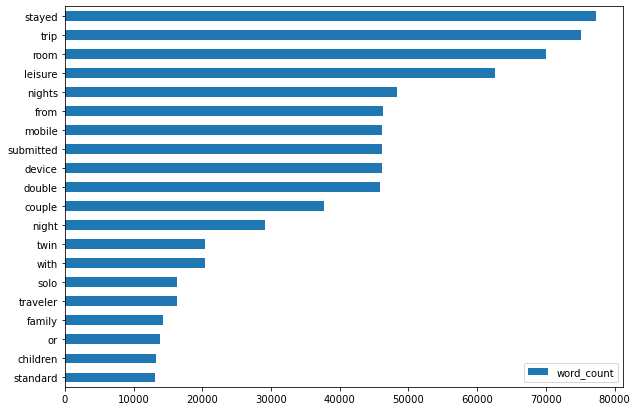

In [69]:
# Get the counts for each word
count1 = df_transformed_tdf_sample1.sum(axis=0).copy()

# Put the counts into a dataframe
count1 = pd.DataFrame({"word_count": count1}, index=count1.index)

# Find the top 20 words by word count and sort the values in descending order, 
top20_1 = count1.nlargest(20, 'word_count').sort_values(by='word_count', ascending=True)

# Plot to show distribution.
top20_1.plot(kind="barh", figsize=(10, 7))

It makes sense that "stayed", "trip", "room", "leisure", and "nights" would be the most commonly used words in hotel reviews. These are also unhelpful words in predicting hotel review score as they are used in good and bad reviews.

Next, I will drop Stopwords, infrequent words (5 or less occurances), the above too-frequent words, the numerical tokens, and punctuation out of the document-term matrix. 
I will also do stemming and lemmatization.

In [70]:
# Import sklearn's stopword package
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


# List of hotel review specific words to add to stopword list
my_stops = ['stayed', 'trip', 'room', 'leisure', 'nights']

# List of numerical tokens to add to my_stops
numerical_tokens = df_transformed_tdf_sample1.iloc[:, 0:23].columns

# List of additional number to add to my_stops just to be cautious
number_list = [str(x).zfill(1) for x in range(10)]

# Append numerical_tokens to my_stops
for i in range(len(numerical_tokens)):
    my_stops.append(numerical_tokens[i])

# Append number_list to my_stops just to be cautious
for n in number_list:
    my_stops.append(n)

# Add my_stops to ENGLISH_STOP_WORDS
stops = ENGLISH_STOP_WORDS.union(my_stops)

# Sanity check
stops

frozenset({'0',
           '00',
           '00am',
           '1',
           '10',
           '11',
           '12',
           '13',
           '14',
           '15',
           '16',
           '17',
           '18',
           '19',
           '2',
           '20',
           '21',
           '22',
           '23',
           '24',
           '25',
           '26',
           '28',
           '3',
           '30',
           '30am',
           '30s',
           '4',
           '5',
           '6',
           '7',
           '8',
           '9',
           'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'a

In [71]:
# Instantiate
tagofwords2 = CountVectorizer(min_df=5, stop_words=stops)

# Fit
tagofwords2.fit(tdf_sample['Tags'])

# Transform
transformed_tdf_sample2 = tagofwords2.transform(tdf_sample['Tags'])
transformed_tdf_sample2

<77360x316 sparse matrix of type '<class 'numpy.int64'>'
	with 465948 stored elements in Compressed Sparse Row format>

In [72]:
# Sanity check
tagofwords2.get_feature_names_out()

array(['acces', 'access', 'accessible', 'adjacent', 'adjoining', 'adult',
       'adults', 'air', 'airport', 'aldwych', 'allergy', 'amiral',
       'andaz', 'annex', 'apartment', 'arc', 'art', 'artiste', 'attach',
       'attic', 'avenue', 'balcony', 'barcelona', 'barlow', 'baronne',
       'basement', 'basic', 'bath', 'bathroom', 'bed', 'bedded',
       'bedroom', 'beds', 'ben', 'big', 'blue', 'boudoir', 'breakfast',
       'bridge', 'budget', 'building', 'business', 'cabin', 'camper',
       'canal', 'cathedral', 'chambers', 'champagne', 'check', 'chelsea',
       'child', 'children', 'church', 'city', 'class', 'classic',
       'classique', 'club', 'comfort', 'compact', 'condal',
       'conditioning', 'congress', 'connecting', 'contemporary', 'cool',
       'corner', 'cosy', 'couch', 'couple', 'courtyard', 'cozy', 'crash',
       'cruise', 'curieuse', 'dalston', 'deck', 'deco', 'delightful',
       'deluxe', 'des', 'design', 'designer', 'device', 'director',
       'disability', 'd

In [73]:
# Convert the sparse matrix (transformed_tdf_sample) into an array
transformed_tdf_sample2.toarray()

# Convert the array (transformed_tdf_sample) into a dataframe
df_transformed_tdf_sample2 = pd.DataFrame(
    columns=tagofwords2.get_feature_names_out(), data=transformed_tdf_sample2.toarray(), index=tdf_sample.index)

display(df_transformed_tdf_sample2)

,acces,access,accessible,adjacent,adjoining,adult,adults,air,airport,aldwych,...,wi,wifi,window,wine,wing,winter,wonderful,xl,xxl,young
82462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
278689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
464475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
431566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


There were 516 unique words originially. After dropping the stopwords, infrequent words, and too-frequent words, numerical tokens, puncuation, and stemming and lemmatization there are now 316 tokens in the corpus.

There is still an issue of duplicate columns, such as 'acc' and 'access'. 'acc' was originally 'acces', a misspelling of 'access', however, during stemming, 'acces' and 'access' were not cut down to the same root. I want to know why 'acces' was cut down to 'acc' and what other words were cut down to 'acc'.

Let's look at the top 20 most frequently used words now.

<AxesSubplot:>

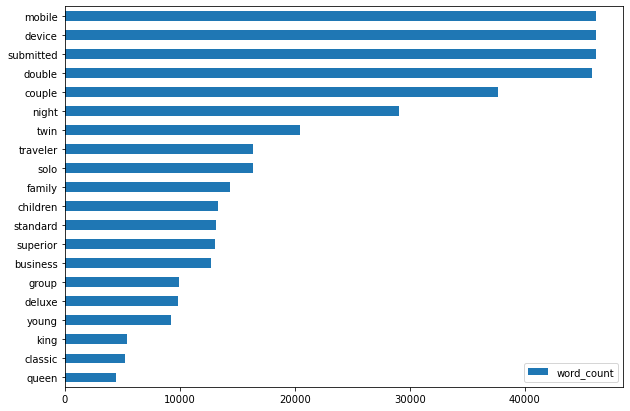

In [74]:
# Get the counts for each word
count2 = df_transformed_tdf_sample2.sum(axis=0).copy()

# Put the counts into a dataframe
count2 = pd.DataFrame({"word_count": count2}, index=count2.index)

# Find the top 20 words by word count and sort the values in descending order, 
top20_2 = count2.nlargest(20, 'word_count').sort_values(by='word_count', ascending=True)

# Plot to show distribution.
top20_2.plot(kind="barh", figsize=(10, 7))

In [75]:
# Add the encoded data to df_clean_sample dataset
X_clean_sample4 = X_clean_sample3.join(df_transformed_tdf_sample2, on=df_transformed_tdf_sample2.index)

# Add the Positive_Review and Negative_Review columns to df_clean_sample
reviews = dirty_X_sample[['Positive_Review', 'Negative_Review']].copy()

X_clean_sample5 = X_clean_sample4.join(reviews, on=reviews.index)

X_clean_sample5.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,"( ,)",...,window,wine,wing,winter,wonderful,xl,xxl,young,Positive_Review,Negative_Review
82462,69,8.6,5,772,14,16,691,48.872259,2.325761,0,...,0,0,0,0,0,0,0,0,Location is excellent The worse was WI FI fac...,WI FI was bad
218261,36,7.0,27,251,17,1,159,48.872967,2.292623,0,...,0,0,0,0,0,0,0,0,Bathroom was bed door was ripped and the show...,Door of the room didn t closed by itself but ...
144535,524,8.2,32,2516,15,1,180,51.498123,-0.179969,0,...,0,0,0,0,0,0,0,1,Location of the hotel and value for money siz...,There was a terrible noise in the bedroom thr...
278689,541,7.9,0,6792,264,1,340,41.411006,2.186601,0,...,0,0,0,0,0,0,0,0,What a fabulous trip From the minute we walke...,No Negative
464475,404,9.1,12,3883,26,7,144,48.214277,16.380178,0,...,0,0,0,0,0,0,0,0,Rooms were awesome and well appointed Very cl...,Front desk guy was snippy though would occasi...


The cleaned dataset now has 2012 rows.

In [76]:
# Remove Hotel_Address from categorical_col_list
categorical_col_list.remove('Tags')
categorical_col_list

['Negative_Review', 'Positive_Review']

### Question 3c)
##### Split the sample into training and test datasets.

In [77]:
X = X_clean_sample5.copy()
y = y_clean_sample.copy()

# Sanity check
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (77360, 2012)
y shape: (77360, 1)


Let's check out the distribution of X and y.

In [78]:
#sns.pairplot(pd.concat([X, y.astype(str)], axis=1), hue='target')
#plt.show()

In [79]:
# Split clean sample dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, stratify=y, random_state=18)

In [80]:
# Check shape
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape:{y_test.shape}")

X_train shape: (54152, 2012)
X_test shape: (23208, 2012)
y_train shape: (54152, 1)
y_test shape:(23208, 1)


Let's check out the distribution of X_train and y_train.

In [81]:
#sns.pairplot(pd.concat([X_train, y_train.astype(str)], axis=1), hue='target')
#plt.show()

### Question 3d)
1. #### Use a count vectorizor to convert and combine the Positive_Review column with the numeric data.

In [82]:
# Instantiate
bagofwords3 = CountVectorizer()

# Fit
bagofwords3.fit(X_train['Positive_Review'])

# Transform
trans_X_train1 = bagofwords3.transform(X_train['Positive_Review'])
trans_X_test1 = bagofwords3.transform(X_test['Positive_Review'])

# Sanity check
print(trans_X_train1.shape)
print(trans_X_test1.shape)

(54152, 15959)
(23208, 15959)


In [83]:
# Sanity check
bagofwords3.get_feature_names_out()

array(['00', '001', '003', ..., 'zuid', 'zuin', 'zwigjerlam'],
      dtype=object)

In [84]:
trans_X_train1.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [85]:
df_trans_X_train1 = pd.DataFrame(columns=bagofwords3.get_feature_names_out(), data=trans_X_train1.toarray(), index=X_train.index)
display(df_trans_X_train1)

,00,001,003,007,00am,00h,00pm,01,0130,02,...,zoltan,zone,zones,zoo,zoological,zorbas,ztl,zuid,zuin,zwigjerlam
409290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155850,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
444960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
371362,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108856,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


There are tokens that will need to be removed from the corpus, such as numerical tokens.

In [86]:
df_trans_X_train1.iloc[:, 0:529]

,00,001,003,007,00am,00h,00pm,01,0130,02,...,aaron,aback,abandoned,abbey,abby,abd,abdcwoukd,abdel,abdul,abdulla
409290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155850,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
444960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
371362,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108856,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
# List of hotel review specific words to add to stopword list
my_stops = ['stayed', 'trip', 'room', 'leisure', 'nights']

# List of numerical tokens to add to my_stops
numerical_tokens = df_trans_X_train1.iloc[:, 0:529].columns

# List of additional number to add to my_stops just to be cautious
number_list = [str(x).zfill(1) for x in range(10)]

# Append numerical_tokens to my_stops
for i in range(len(numerical_tokens)):
    my_stops.append(numerical_tokens[i])

# Append number_list to my_stops just to be cautious
for n in number_list:
    my_stops.append(n)

# Add my_stops to ENGLISH_STOP_WORDS
stops = ENGLISH_STOP_WORDS.union(my_stops)

# Sanity check
stops

frozenset({'0',
           '00',
           '001',
           '003',
           '007',
           '00am',
           '00h',
           '00pm',
           '01',
           '0130',
           '02',
           '03',
           '0430',
           '05',
           '05july2017',
           '06',
           '0645',
           '07',
           '0706',
           '08',
           '0830am',
           '0900',
           '0d',
           '0k',
           '1',
           '10',
           '100',
           '100m',
           '100mtrs',
           '100x',
           '100x100',
           '101',
           '102',
           '102015',
           '103',
           '104',
           '105',
           '106',
           '107',
           '108',
           '109',
           '10am',
           '10eur',
           '10h',
           '10instead',
           '10kms',
           '10m',
           '10min',
           '10mins',
           '10mintues',
           '10minute',
           '10minutes',
           '10of

In [88]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stemmer = nltk.stem.PorterStemmer()

#ENGLISH_STOP_WORDS = stopwords.words('english')

def myTokenizer(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark, '').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []

    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in stops) and (word != ''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/audreygilbreath/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [89]:
# Instantiate
bagofwords4 = CountVectorizer(min_df=8, stop_words=stops, tokenizer=myTokenizer)

# Fit
bagofwords4.fit(X_train['Positive_Review'])

# Transform
trans_X_train2 = bagofwords4.transform(X_train['Positive_Review'])
trans_X_test2 = bagofwords4.transform(X_test['Positive_Review'])

/Users/audreygilbreath/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [90]:
bagofwords4.get_feature_names_out()

array(['abil', 'abl', 'absolut', ..., 'ziggo', 'zone', 'zoo'],
      dtype=object)

In [91]:
# Finish vectorizing train dataset
# Convert the sparse matrix (trans_X_train2) into an array
trans_X_train2.toarray()

# Convert the array (trans_X_train2) into a dataframe
df_trans_X_train2 = pd.DataFrame(data=trans_X_train2.toarray(
), columns=bagofwords4.get_feature_names_out(), index=X_train.index)

# Add the vectorized dataframe to the X_train dataframe
X_train = pd.concat([X_train, df_trans_X_train2], axis=1, join="inner")

# Drop the Positive_Review column now that it has been vectorized
X_train = X_train.drop('Positive_Review', axis=1)
X_train.shape

(54152, 4377)

In [92]:
# Finish vectorizing test dataset
# Convert the sparse matrix (trans_X_train2) into an array
trans_X_test2.toarray()

# Convert the array (trans_X_train2) into a dataframe
df_trans_X_test2 = pd.DataFrame(data=trans_X_test2.toarray(
), columns=bagofwords4.get_feature_names_out(), index=X_test.index)

# Add the vectorized dataframe to the X_train dataframe
X_test = pd.concat([X_test, df_trans_X_test2], axis=1, join="inner")

# Drop the Positive_Review column now that it has been vectorized
X_test = X_test.drop('Positive_Review', axis=1)
X_test.shape

(23208, 4377)

2,366 unique words were vectorized and added to X_train resulting in a total of 4,377 columns.

2. #### Use a count vectorizor to convert and combine the Negative_Review column with the numeric data.

In [93]:
# Instantiate
bagofwords3 = CountVectorizer()

# Fit
bagofwords3.fit(X_train['Negative_Review'])

# Transform
trans_X_train1 = bagofwords3.transform(X_train['Negative_Review'])
trans_X_test1 = bagofwords3.transform(X_test['Negative_Review'])

In [94]:
# Sanity check
print(trans_X_train1.shape)
print(trans_X_test1.shape)

(54152, 18279)
(23208, 18279)


In [95]:
# Sanity check
bagofwords3.get_feature_names_out()

array(['00', '000', '000000', ..., 'zuid', 'zuiver', 'zwembad'],
      dtype=object)

In [96]:
# Finish vectorizing test dataset
# Convert the sparse matrix (trans_X_test2) into an array
trans_X_test1.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [97]:
# Convert the array (trans_X_test2) into a dataframe
df_trans_X_test1 = pd.DataFrame(columns=bagofwords3.get_feature_names_out(), data=trans_X_test1.toarray(), index=X_test.index)
display(df_trans_X_test1)

,00,000,000000,001,004,008,00a,00am,00gbp,00h,...,zink,zipper,zod,zombies,zone,zoo,zoom,zuid,zuiver,zwembad
307187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136493,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
407910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
327458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
513839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
393461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


There are more than 18,000 columns.

There are tokens that will need to be removed from the corpus, such as numerical tokens.

In [98]:
# List of hotel review specific words to add to stopword list
my_stops = ['stayed', 'trip', 'room', 'leisure', 'nights']

# List of numerical tokens to add to my_stops
numerical_tokens = df_trans_X_test1.iloc[:, 0:909].columns

# List of additional number to add to my_stops just to be cautious
number_list = [str(x).zfill(1) for x in range(10)]

# Append numerical_tokens to my_stops
for i in range(len(numerical_tokens)):
    my_stops.append(numerical_tokens[i])

# Append number_list to my_stops just to be cautious
for n in number_list:
    my_stops.append(n)

# Add my_stops to ENGLISH_STOP_WORDS
stops = ENGLISH_STOP_WORDS.union(my_stops)

# Sanity check
stops

frozenset({'5hours',
           'we',
           '224',
           '76',
           '40years',
           'system',
           '69',
           '70c',
           '22nd',
           'amongst',
           'find',
           '12min',
           '15mins',
           '730',
           '86m',
           '30and',
           '2star',
           '00',
           '200aud',
           '30e',
           '259',
           'twelve',
           '330ml',
           '117',
           'twenty',
           '1401',
           'own',
           '809',
           '211',
           '289',
           '27c',
           'our',
           '200euros',
           '364',
           '400',
           '415',
           '212',
           '892',
           '102',
           'yourself',
           '4x4',
           '505',
           '16degrees',
           '300eur',
           'made',
           'nine',
           '50euros',
           '12am',
           'my',
           'never',
           '20am',
           '180x90cm'

In [99]:
# Tokenizer function

# Instantiate
stemmer = nltk.stem.PorterStemmer()

def myTokenizer(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark, '').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []

    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in stops) and (word != ''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

In [100]:
# Instantiate
bagofwords4 = CountVectorizer(min_df=8, stop_words=stops, tokenizer=myTokenizer)

# Fit
bagofwords4.fit(X_train['Negative_Review'])

# Transform
trans_X_train2 = bagofwords4.transform(X_train['Negative_Review'])
trans_X_test2 = bagofwords4.transform(X_test['Negative_Review'])

trans_X_train2

/Users/audreygilbreath/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



<54152x2846 sparse matrix of type '<class 'numpy.int64'>'
	with 364597 stored elements in Compressed Sparse Row format>

There are now just over 2,800 columns; considerably less than 18,000.

In [101]:
bagofwords4.get_feature_names_out()

array(['abandon', 'abil', 'abit', ..., 'younger', 'zero', 'zone'],
      dtype=object)

In [102]:
# Finish vectorizing train dataset
# Convert the sparse matrix (trans_X_train2) into an array
trans_X_train2.toarray()

# Convert the array (trans_X_train2) into a dataframe
df_trans_X_train2 = pd.DataFrame(data=trans_X_train2.toarray(
), columns=bagofwords4.get_feature_names_out(), index=X_train.index)

# Add the vectorized dataframe to the X_train dataframe
X_train = pd.concat([X_train, df_trans_X_train2], axis=1, join="inner")

# Drop the Positive_Review column now that it has been vectorized
X_train = X_train.drop('Negative_Review', axis=1)
X_train.shape

(54152, 7222)

In [103]:
# Finish vectorizing test dataset
# Convert the sparse matrix (trans_X_train2) into an array
trans_X_test2.toarray()

# Convert the array (trans_X_train2) into a dataframe
df_trans_X_test2 = pd.DataFrame(data=trans_X_test2.toarray(
), columns=bagofwords4.get_feature_names_out(), index=X_test.index)

# Add the vectorized dataframe to the X_train dataframe
X_test = pd.concat([X_test, df_trans_X_test2], axis=1, join="inner")

# Drop the Positive_Review column now that it has been vectorized
X_test = X_test.drop('Negative_Review', axis=1)
X_test.shape

(23208, 7222)

There are now 7,222 columns in the train and test data.

Let's check out the distribution of X_train and y_train.

In [104]:
#sns.pairplot(pd.concat([X_train, y_train.astype(str)], axis=1), hue='target')
#plt.show()

### Question 3e)
##### What does the min_df parameter do?

The min_df parameter tells `CountVectorizer()` to remove tokens that have a count less than min_df. For instance, CountVectorizer(min_df=8) will drop tokens that appear less than eight times within the documents.

---
# References

https://kodify.net/python/math/round-integers/

https://stackoverflow.com/questions/24386489/adding-words-to-scikit-learns-countvectorizers-stop-list